# Présentation de MLFlow

MLFlow est une plate-forme open source pour le cycle de vie de l'apprentissage automatique (ML), en mettant l'accent sur la reproductibilité, la formation et le déploiement. Il est basé sur une conception d'interface ouverte et est capable de fonctionner avec n'importe quel langage ou plate-forme, avec des clients en Python et Java, et est accessible via une API REST. 

L'évolutivité est également un avantage important qu'un développeur ML peut exploiter avec MLflow. Dans ce chapitre du repo, nous examinerons le fonctionnement de MLflow, à l'aide d'exemples et d'exemples de code. Cela jettera les bases nécessaires pour le reste du repo afin d'utiliser le concept pour concevoir un projet de ML de bout en bout. Plus précisément, nous examinerons les sections suivantes dans ce chapitre :

* Qu'est-ce que le ML ? ow ?
* Premiers pas avec MLflow
* Exploration des modules MLflow

## Qu'est-ce que MLflow ?

La mise en œuvre d'un produit basé sur ML peut être une tâche laborieuse. Il existe un besoin général de réduire les frictions entre les différentes étapes du cycle de vie du développement ML et entre les équipes de data scientists et d'ingénieurs impliqués dans le processus. 

Les praticiens du ML, tels que les data scientists et les ingénieurs du ML, opèrent avec différents systèmes, normes et outils. Alors que les data scientists passent la plupart de leur temps à développer des modèles dans des outils tels que Jupyter Notebooks, lors de l'exécution en production, le modèle est déployé dans le contexte d'une application logicielle avec un environnement plus exigeant en termes d'échelle et de fiabilité. 


Un phénomène courant dans les projets ML est de faire réimplémenter les modèles par une équipe d'ingénieurs, créant un système sur mesure pour servir le modèle spécifique. Un ensemble de défis est courant avec les équipes qui suivent des approches sur mesure concernant le développement de modèles : 

* Projets de ML dépassant le budget en raison de la nécessité de créer une infrastructure logicielle sur mesure pour développer et servir des modèles

* Erreurs de traduction lors de la réimplémentation des modèles produits par les scientifiques des données 

* Problèmes d'évolutivité lors de la diffusion des prédictions

* Friction en termes de reproduction des processus de formation entre les scientifiques des données en raison d'un manque d'environnements standard 

Les entreprises tirant parti du ML ont tendance à créer leurs propres systèmes internes (souvent extrêmement laborieux) afin d'assurer un processus fluide et structuré de Développement ML. Les plateformes de ML largement documentées incluent des systèmes tels que Michelangelo et FBLearner, d'Uber et Facebook, respectivement. C'est dans le contexte de l'adoption croissante du ML que MLflow a été initialement créé chez Databricks et open source en tant que plate-forme, pour aider à la mise en œuvre des systèmes de ML. 

MLflow permet à un praticien de tous les jours dans une plate-forme de gérer le ML cycle de vie, de l'itération sur le développement du modèle jusqu'au déploiement dans un environnement fiable et évolutif compatible avec les exigences des systèmes logiciels modernes.

## Pour commencer avec MLFlow

Next, nous allons installer MLflow sur votre machine et le préparer pour une utilisation dans ce chapitre. Vous aurez deux options pour installer MLflow. La première option consiste à utiliser une recette basée sur un conteneur Docker fournie dans le référentiel du livre : https://github.com/PacktPublishing/Machine-Learning-Engineering-with-Mlflow.git. Pour l'installer, suivez ces instructions :

1. Utilisez les commandes suivantes pour installer le logiciel :


    $ git clone https://github.com/PacktPublishing/Machine-Learning-Engineering-with-Mlflow.git
    $ cd Machine-Learning-Engineering-with-Mlflow
    
    $ cd Chapter01

2. L'image Docker est très simple à ce stade : elle contient simplement MLflow et sklearn, les principaux outils à utiliser dans ce chapitre du guise. A des fins d'illustration, vous pouvez consulter le contenu du Dockerfile


    FROM jupyter/scipy-notebook

    RUN pip install mlflow

    RUN pip install sklearn

3. Pour créer l'image, vous devez maintenant exécuter la commande suivante :


    docker build -t chapter_1_homlflow


4. Juste après la création de l'image, vous pouvez exécuter la commande ./run.sh 


    /run.sh


5. Ouvrez votre navigateur sur http://localhost:888 et vous devriez pouvoir accéder au dossier Chapter01.


Dans la section suivante, nous développerons notre premier modèle avec MLflow dans l'environnement Jupyter créé dans l'ensemble d'étapes précédent

## Développer votre premier modèle avec MLflow 

Du point de vue de la simplicité, dans cette section, nous utiliserons les exemples de jeux de données intégrés dans sklearn, la bibliothèque ML que nous utiliserons initialement pour explorer les fonctionnalités de MLflow. 

Pour cette section, nous choisirons le célèbre jeu de données Iris pour former un classificateur multi-classes à l'aide de MLflow.

Iris dataset (l'un des jeux de données intégrés de sklearn disponibles sur https://scikit-learn.org/stable/datasets/toy_dataset.html) contient les éléments suivants en tant que caractéristiques : longueur des sépales, largeur des sépales, longueur des pétales et largeur des pétales. La variable cible est la classe de l'iris : Iris Setosa, Iris Versocoulor, ou Iris Virginica:

1. Chargez l'exemple d'ensemble de données :

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.4)

2. Entraînons ensuite votre modèle. L'entraînement d'un modèle de machine simple avec un framework tel que scikit-learn implique l'instanciation d'un estimateur tel que LogisticRegression et l'appel de la commande fit pour exécuter l'entraînement sur l'ensemble de données Iris intégré à scikit-learn :

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Les lignes de code précédentes ne sont qu'une petite partie du processus d'ingénierie ML. Comme cela sera démontré, une quantité non négligeable de code doit être créée afin de produire et de s'assurer que le code de formation précédent est utilisable et fiable. L'un des principaux objectifs de MLflow est d'aider au processus de mise en place de systèmes et de projets de ML. Dans les sections suivantes, nous montrerons comment MLflow peut être utilisé pour rendre vos solutions robustes et fiables


3. Ensuite, nous allons ajouter MLflow. Avec quelques lignes de code supplémentaires, vous devriez pouvoir démarrer votre première interaction MLflow. Dans la liste de code suivante, nous commençons par importer le module mlflow, suivi de la classe LogisticRegression dans scikit-learn. Vous pouvez utiliser le bloc-notes Jupyter qui l'accompagne pour exécuter la section suivante

In [ ]:
### Train your classifier with MLFlow supportn.linear_model import LogisticRegression
import mlflow
from sklearn.linear_model import LogisticRegression

# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run():
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

L'instruction mlflow.sklearn.autolog() vous permet de consigner automatiquement l'expérience dans le répertoire local. Il capture les métriques produites par la bibliothèque ML sous-jacente en cours d'utilisation. MLflow Tracking est le module responsable de la gestion des métriques et des journaux. Par défaut, les métadonnées d'une exécution de MLflow sont stockées dans le système de fichiers local

4. Si vous exécutez l'extrait suivant sur le document racine du bloc-notes qui l'accompagne, vous devriez maintenant avoir les fichiers suivants dans votre répertoire personnel suite à l'exécution de la commande suivante :

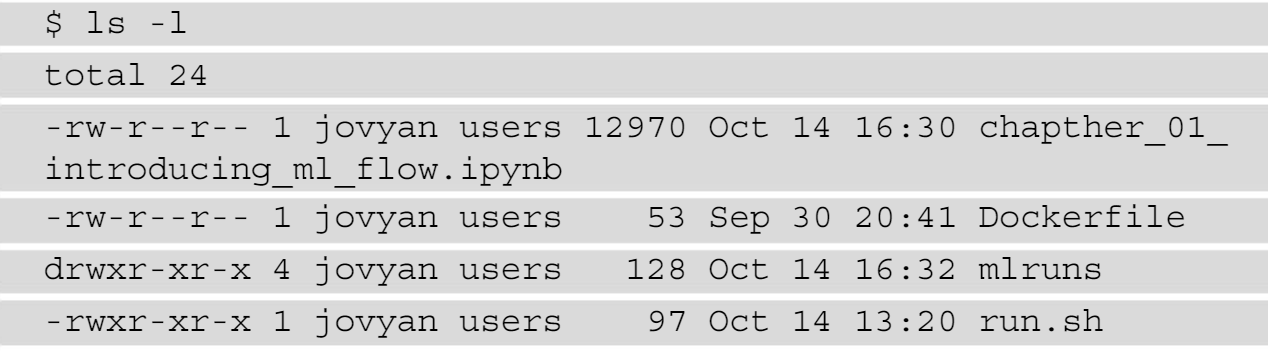

Le dossier mlruns est généré à côté de votre dossier notebook et contient toutes les expériences exécutées par votre code dans le contexte actuel. Le dossier mlruns contiendra un dossier avec un numéro séquentiel identifiant votre expérience. Le contour du dossier apparaîtra comme suit :


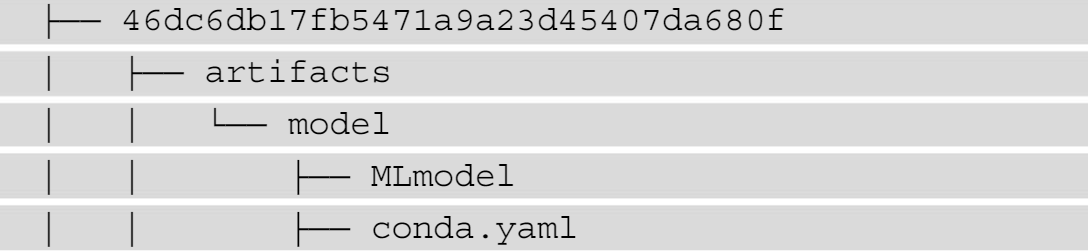

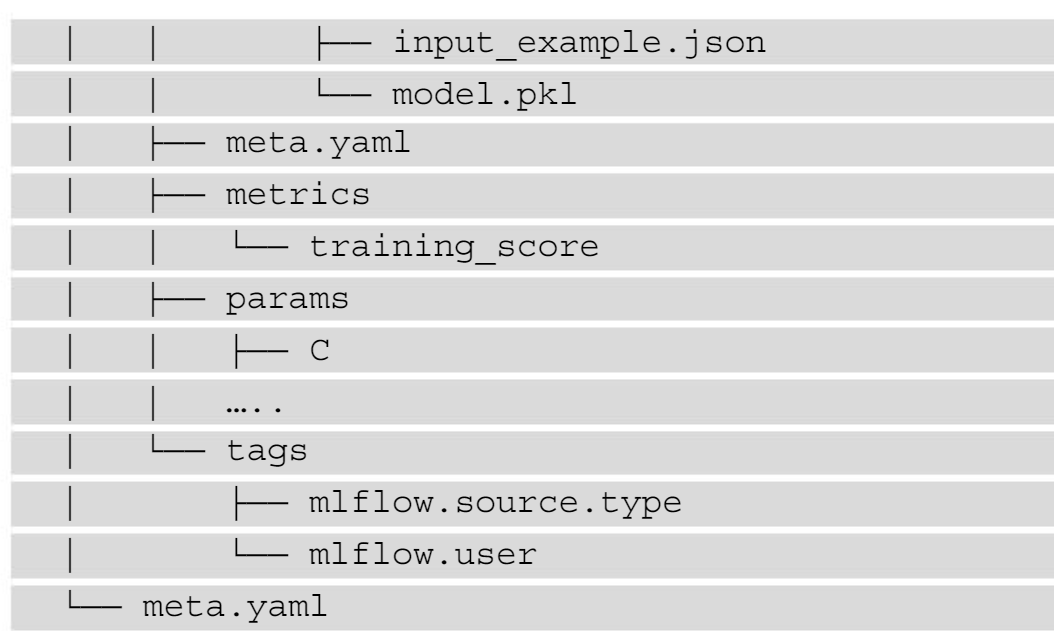


Ainsi, avec très peu d'efforts, nous avons beaucoup de traçabilité à notre disposition, et une bonne base à améliorer. 

Votre expérience est identifiée comme UUID sur l'échantillon précédent par 46dc6db17fb5471a9a23d45407da680f. A la racine du répertoire, vous avez un fichier yaml nommé meta.yaml, qui contient le contenu :

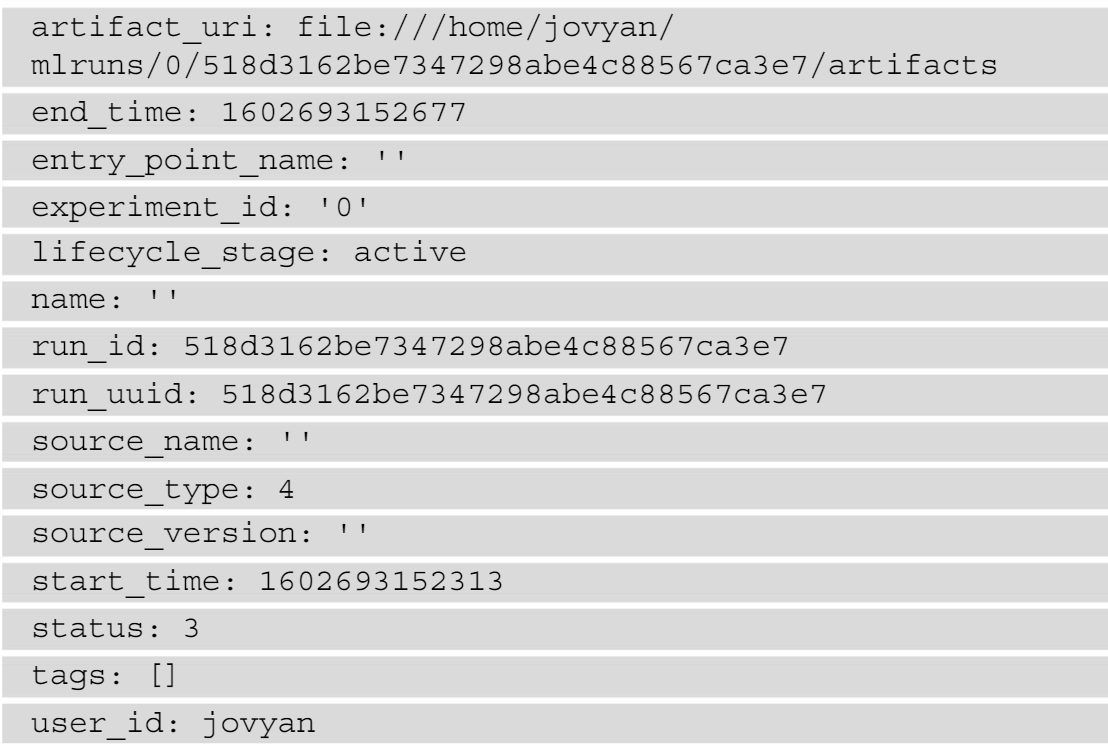


Il s'agit des métadonnées de base de votre expérience, avec des informations comprenant l'heure de début, l'heure de fin, l'identification de l'exécution (run_id et run_uuid), une hypothèse de l'étape du cycle de vie et l'utilisateur qui a exécuté l'expérience. Les paramètres sont essentiellement basés sur une exécution par défaut, mais fournissent des informations précieuses et lisibles concernant votre expérience :

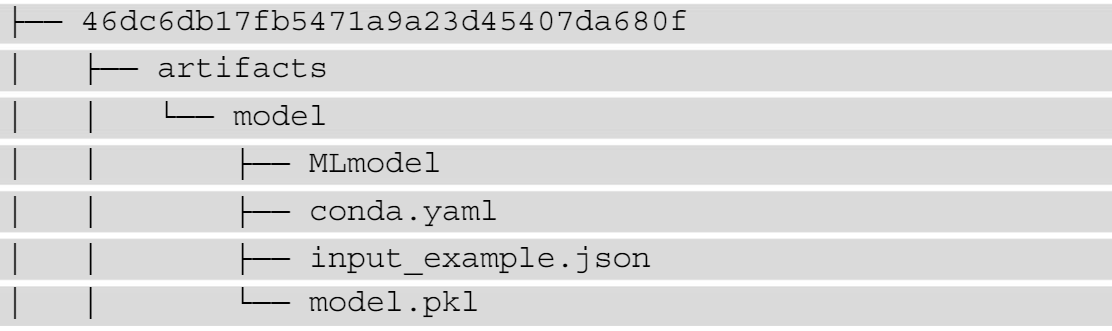

Le fichier model.pkl contient une version sérialisée du modèle. Pour un modèle scikit-learn, il existe une version binaire du code Python du modèle. Lors de la journalisation automatique, les métriques sont exploitées à partir de la bibliothèque de machines sous-jacente en cours d'utilisation. 


La stratégie de packaging par défaut était basée sur un fichier conda.yaml, avec les bonnes dépendances pour pouvoir sérialiser le modèle. Le fichier MLmodel est la définition principale du projet à partir d'un projet MLflow avec des informations sur la façon d'exécuter l'inférence sur le modèle actuel. Le dossier metrics contient la valeur du score d'entraînement de cette exécution particulière du processus d'entraînement. , qui peut être utilisé pour comparer le modèle avec d'autres améliorations du modèle sur toute la ligne. 

Le dossier params sur la première liste de dossiers contient les paramètres par défaut du modèle de régression logistique, avec les différentes possibilités par défaut répertoriées de manière transparente et stockées automatiquement

## Exploration des modules MLflow

Les modules MLflow sont des composants logiciels qui fournissent les fonctionnalités de base qui facilitent les différentes phases du cycle de vie ML. 

Les fonctionnalités de MLflow sont fournies via des modules, des composants extensibles qui organisent les fonctionnalités associées dans la plate-forme. Voici les modules intégrés dans MLflow :

*MLow Tracking : fournit un mécanisme et une interface utilisateur pour gérer les métriques et les artefacts générés par les exécutions ML (formation et inférence)

* Mlflow Projects : un format de package pour standardiser les projets ML

* Mlflow Models : un mécanisme qui se déploie dans différents types d'environnements, à la fois sur site et dans le cloud

* Mlflow Model Registry : un module qui gère la gestion des modèles dans MLflow et son cycle de vie, y compris l'état


Afin d'explorer les différents modules, nous allons installer MLflow dans votre environnement local à l'aide de la commande suivante



In [ ]:
#! pip install mlflow

## Explorer les projets MLflow

Un projet MLflow représente l'unité de base de l'organisation des projets ML. Il existe trois environnements différents pris en charge par les projets MLflow : l'environnement Conda, Docker et le système local


Voici un exemple de fichier MLproject d'un environnement conda :


    name: condapred
    
    conda_env:  
      image: conda.yaml
      
    entry_points:  
      main:   command: "python mljob.py"


Dans l'option conda, l'hypothèse est qu'il existe un fichier conda.yaml avec les dépendances requises. MLflow, lorsqu'on lui a demandé d'exécuter le projet, démarrera l'environnement avec les dépendances spécifiées


L'environnement basé sur le système ressemblera à ce qui suit ; c'est en fait assez simple :


    name: syspred
    
    entry_points:  
      main:    command: "python mljob.py"


La variante système précédente s'appuiera essentiellement sur les dépendances de l'environnement local, en supposant que le système d'exploitation sous-jacent contient toutes les dépendances. Cette approche est particulièrement sujette aux conflits de bibliothèque avec le système d'exploitation sous-jacent ; il peut être utile dans des contextes où il existe déjà un environnement de système d'exploitation qui correspond au projet.

Voici un fichier MLproject basé sur l'environnement Docker :


    name: syspred
    
    docker_env:  
      image: stockpred-docker
      
    entry_points:  
      main:    command: "python mljob.py"


Une fois que vous avez votre environnement, le fichier principal qui définit à quoi doit ressembler votre projet est le fichier MLProject. Ce fichier est utilisé par MLflow pour comprendre comment il doit exécuter votre projet

## Développer votre premier pipeline de bout en bout dans MLflow

Nous allons prototyper un projet de prévision de stock simple dans cette section avec MLflow et documenter les différents fichiers et phases de la solution. Vous le développerez dans votre système local en utilisant MLflow et Docker installés localement.


La tâche dans ce projet illustratif est de créer un projet MLflow de base et de produire un modèle ML de base de travail pour prédire, sur la base des signaux du marché sur un certain nombre de jours, si le marché boursier va monter ou descendre


Dans cette section, nous utiliserons un ensemble de données Yahoo Finance disponible pour coter la paire BTC-USD dans https://finance.yahoo.com/quote/BTC-USD/ sur une période de 3 mois. Nous entraînerons un modèle pour prédire si la cotation augmentera ou non un jour donné. 

Une API REST sera mise à disposition pour les prédictions via MLflow. Nous allons illustrer, étape par étape, la création d'un projet MLflow pour former un classificateur sur les données boursières, en utilisant l'API Yahoo pour les informations financières récupérées à l'aide de le lecteur de données pandas du paquet : 

1. Ajoutez votre fichier MLProject :


    name: stockpred

    docker_env:
      image:  stockpred

    entry_points:
      main:
        command: "python train.py"


Le fichier MLProject précédent spécifie que les dépendances seront gérées dans Docker avec un nom d'image spécifique. MLflow essaiera d'extraire l'image à l'aide de la version de Docker installée sur votre système. S'il ne le trouve pas, il essaiera de le récupérer à partir de Docker Hub. Pour les objectifs de ce chapitre, il est tout à fait normal d'avoir MLflow en cours d'exécution sur votre machine locale. La deuxième configuration que nous ajoutons à notre projet est la commande principale du point d'entrée. La commande à exécuter invoquera dans l'environnement Docker le fichier Python train.py, qui contient le code de notre projet


2. Ajoutez un fichier Docker au projet. De plus, vous pouvez spécifier l'URL du registre Docker de votre image. L'avantage d'exécuter Docker est que votre projet n'est pas lié au langage Python, comme nous le verrons dans la section avancée de ce guide. L'API MLflow est disponible dans une interface Rest aux côtés des clients officiaux : Python, Java et R :


    FROM continuumio/miniconda3

    RUN pip install mlflow>=1.18.0 \
        && pip install numpy \
        && pip install scipy \
        && pip install pandas \
        && pip install scikit-learn \
        && pip install cloudpickle \
        && pip install pandas_datareader==0.10.0
        && pip install yfinance


Le fichier d'image Docker précédent est basé sur le package open source Miniconda, un programme d'installation minimal gratuit avec un ensemble minimal de packages pour la science des données qui nous permet de contrôler les détails des packages dont nous avons besoin dans notre environnement. Nous spécifierons le version de MLflow (notre plateforme ML), numpy et scipy pour les calculs numériques. Cloudpickle nous permet de sérialiser facilement des objets. Nous utiliserons pandas pour gérer les trames de données, et pandas_datareader pour nous permettre de récupérer facilement les données de sources publiques

3. Importez les packages nécessaires au projet. Sur la liste suivante, nous importons explicitement toutes les bibliothèques que nous utiliserons lors de l'exécution du script de formation : la bibliothèque pour lire les données, et les diérents modules sklearn liés au modèle de ML initial choisi :

In [ ]:
import warnings

import numpy as np
import datetime
import pandas_datareader.data as web
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import mlflow.sklearn

Nous avons explicitement choisi pour le problème de détection des mouvements boursiers un RandomForestClassifier, en raison du fait qu'il s'agit d'un modèle de base extrêmement polyvalent et largement accepté pour les problèmes de classification.

4. Acquérir vos données d'entraînement. Le composant du code qui acquiert l'ensemble de données d'actions Yahoo Finance est intentionnellement petit, nous choisissons donc un intervalle spécifique de 3 mois pour former notre classificateur. l'ensemble de données pertinent :

In [ ]:
def acquire_training_data():
    start = datetime.datetime(2019, 7, 1)
    end = datetime.datetime(2019, 9, 30)
    df = web.DataReader("BTC-USD", 'yahoo', start, end)
    return 

Le format des données acquises est le format classique des titres financiers dans les API d'échange. Pour chaque jour de la période, nous récupérons les données suivantes : la valeur la plus élevée du titre, les valeurs les plus basses, d'ouverture et de clôture du titre, ainsi que le volume. La colonne finale représente la valeur de clôture ajustée, la valeur après les dividendes et les fractionnements


5. Rendre les données utilisables par scikit-learn. Les données acquises à l'étape précédente ne sont clairement pas directement utilisables par RandomForestAlgorithm, qui se nourrit de caractéristiques catégorielles. Afin de faciliter l'exécution de cela, nous allons transformer les données brutes en un vecteur de caractéristiques en utilisant la technique de la fenêtre roulante

Fondamentalement, le vecteur de caractéristiques pour chaque jour devient les deltas entre les jours de fenêtre actuels et précédents. Dans ce cas, on utilise le mouvement de marché de la veille (1 pour un titre en hausse, 0 sinon) :

In [ ]:
def digitize(n):
    if n > 0:
        return 1
    return 0

def rolling_window(a, window):
    """
        Takes np.array 'a' and size 'window' as parameters
        Outputs an np.array with all the ordered sequences of values of 'a' of size 'window'
        e.g. Input: ( np.array([1, 2, 3, 4, 5, 6]), 4 )
             Output: 
                     array([[1, 2, 3, 4],
                           [2, 3, 4, 5],
                           [3, 4, 5, 6]])
    """
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)



def prepare_training_data(data):

    """
        Return a prepared numpy dataframe
        input : Dataframe with expected schema
    """
    data['Delta'] = data['Close'] - data['Open']
    data['to_predict'] = data['Delta'].apply(lambda d: digitize(d))
    return data

6. Entraînez et stockez votre modèle dans MLflow.

cette partie de la liste de code suivante appelle les méthodes de préparation des données déclarées précédemment et exécute le processus de prédiction.
l'exécution principale enregistre également explicitement le modèle ML formé dans l'exécution actuelle dans le Environnement MLflow

In [ ]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")

    with mlflow.start_run():

        training_data = acquire_training_data()

        prepared_training_data_df = prepare_training_data(training_data)

        btc_mat = prepared_training_data_df.to_numpy()

        WINDOW_SIZE = 14

        X = rolling_window(btc_mat[:, 7], WINDOW_SIZE)[:-1, :]
        Y = prepared_training_data_df['to_predict'].to_numpy()[WINDOW_SIZE:]

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4284, stratify=Y)

        clf = RandomForestClassifier(bootstrap=True, criterion='gini', min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50, random_state=4284, verbose=0)

        clf.fit(X_train, y_train)

        predicted = clf.predict(X_test)

        mlflow.sklearn.log_model(clf, "model_random_forest")

        print(classification_report(y_test, predicted))

        mlflow.log_metric("precision_label_0", precision_score(y_test, predicted, pos_label=0))
        mlflow.log_metric("recall_label_0", recall_score(y_test, predicted, pos_label=0))
        mlflow.log_metric("f1score_label_0", f1_score(y_test, predicted, pos_label=0))
        mlflow.log_metric("precision_label_1", precision_score(y_test, predicted, pos_label=1))
        mlflow.log_metric("recall_label_1", recall_score(y_test, predicted, pos_label=1))
        mlflow.log_metric("f1score_label_1", f1_score(y_test, predicted, pos_label=1))

La méthode mlflow.sklearn.log_model(clf, "model_random_forest") prend en charge la persistance du modèle lors de l'entraînement. Contrairement à l'exemple précédent, nous demandons explicitement à MLflow d'enregistrer le modèle et les métriques que nous trouvons pertinentes. Cette flexibilité dans les éléments à enregistrer permet à un programme d'enregistrer plusieurs modèles dans MLflow. Au final, la mise en page de votre projet devrait ressembler à ce qui suit, en fonction des fichiers créés précédemment :


    ├── Dockerfile
    ├── MLproject
    ├── README.md
    └── train.py


7. Créez l'image Docker de votre projet. Afin de créer votre image Docker, vous devez exécuter la commande suivante :


    docker build -t stockpred -f dockerfile


Cela construira l'image spéciée précédemment avec la balise stockpred. Cette image sera utilisable dans MLflow dans les étapes suivantes car le modèle est maintenant connecté à votre registre local.


8. Exécutez votre projet. Afin d'exécuter votre projet, vous pouvez maintenant exécuter le projet MLflow :


mlflow run .


Votre sortie devrait ressembler à l'extrait présenté ici :


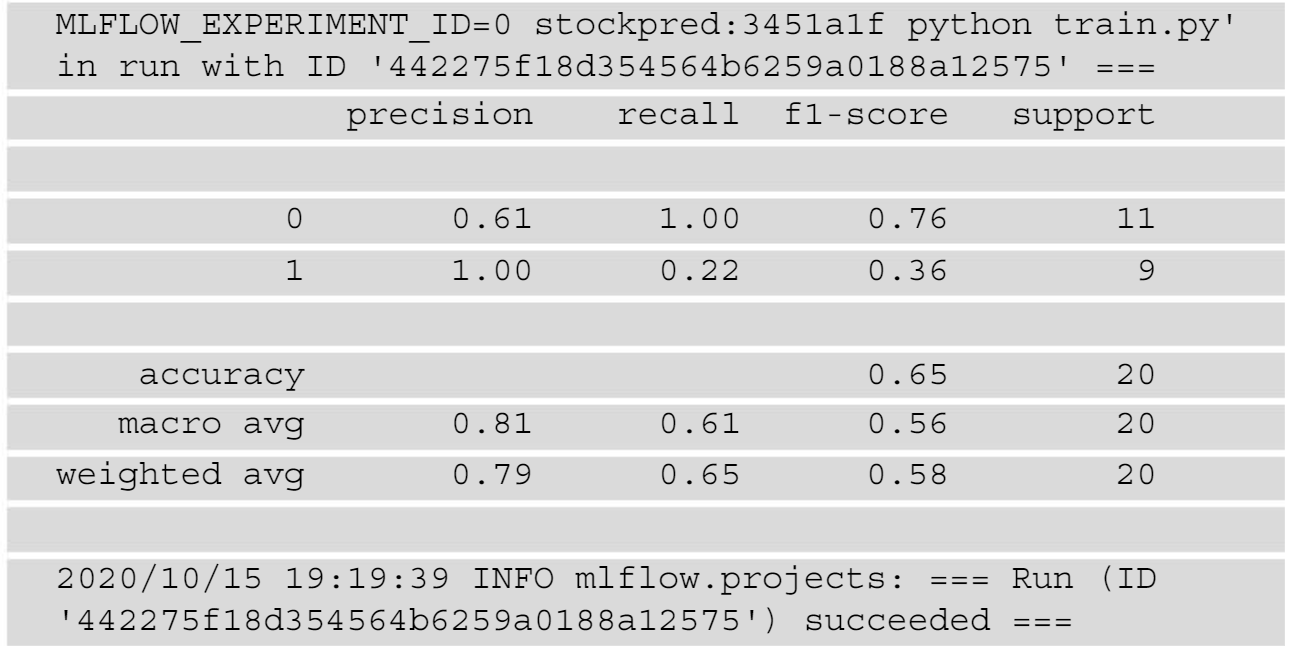

Il contient une impression de votre modèle, l'ID de votre expérience et les métriques capturées au cours de l'exécution en cours. 

À ce stade, vous disposez d'une base de référence simple et reproductible d'un pipeline de prédiction de stock utilisant MLflow que vous pouvez améliorer partager facilement avec les autres.




## Réexécution d'expériences

Une autre fonctionnalité extrêmement utile de MLflow est la possibilité de réexécuter une expérience spécifique avec les mêmes paramètres que ceux avec lesquels elle a été exécutée à l'origine.


Par exemple, vous devriez pouvoir exécuter votre projet précédent en spécifiant l'URL GitHub du projet :


    mlflow run https://github.com/PacktPublishing/Machine-Learning-Engineering-with-MLflow/tree/master/Chapter01/stockpred



Fondamentalement, ce qui se passe avec la commande précédente, c'est que MLflow clone le référentiel dans un répertoire temporaire et l'exécute, selon la recette sur MLProject.

l'ID de l'expérience (ou le nom) vous permet d'exécuter le projet avec le paramètres d'origine, permettant ainsi une reproductibilité complète du projet. La fonction de projets MLflow permet à votre projet de s'exécuter dans des environnements cloud avancés tels que Kubernetes et Databricks. 

La mise à l'échelle de votre travail ML de manière transparente est l'un des principaux arguments de vente d'une plate-forme telle que MLflow.Comme vous l'avez vu dans la section actuelle, le module de projet MLflow permet l'exécution d'un travail ML reproductible qui est traité comme -projet contenu

## Exploration du suivi de MLflow

Le composant de suivi de MLflow est responsable de l'observabilité. Les principales fonctionnalités de ce module sont la journalisation des métriques, des artefacts et des paramètres d'une exécution MLflow. Il fournit des fonctionnalités de visualisation et de gestion des artefacts. 

Dans un environnement de production, il est utilisé comme un serveur de suivi centralisé implémenté en Python qui peut être partagé par un groupe de praticiens du ML dans une organisation. Cela permet de partager les améliorations des modèles ML au sein de l'organisation. 

Dans la figure 1.4, vous pouvez voir une interface qui enregistre toutes les exécutions de votre modèle et vous permet d'enregistrer les observables de votre expérience (métriques, fichiers, modèles et artefacts). Pour chaque exécution, vous pouvez rechercher et comparer les différentes métriques et paramètres de votre module. Il résout les problèmes courants lorsque les développeurs de modèles comparent différentes itérations de leurs modèles sur différents paramètres et paramètres.

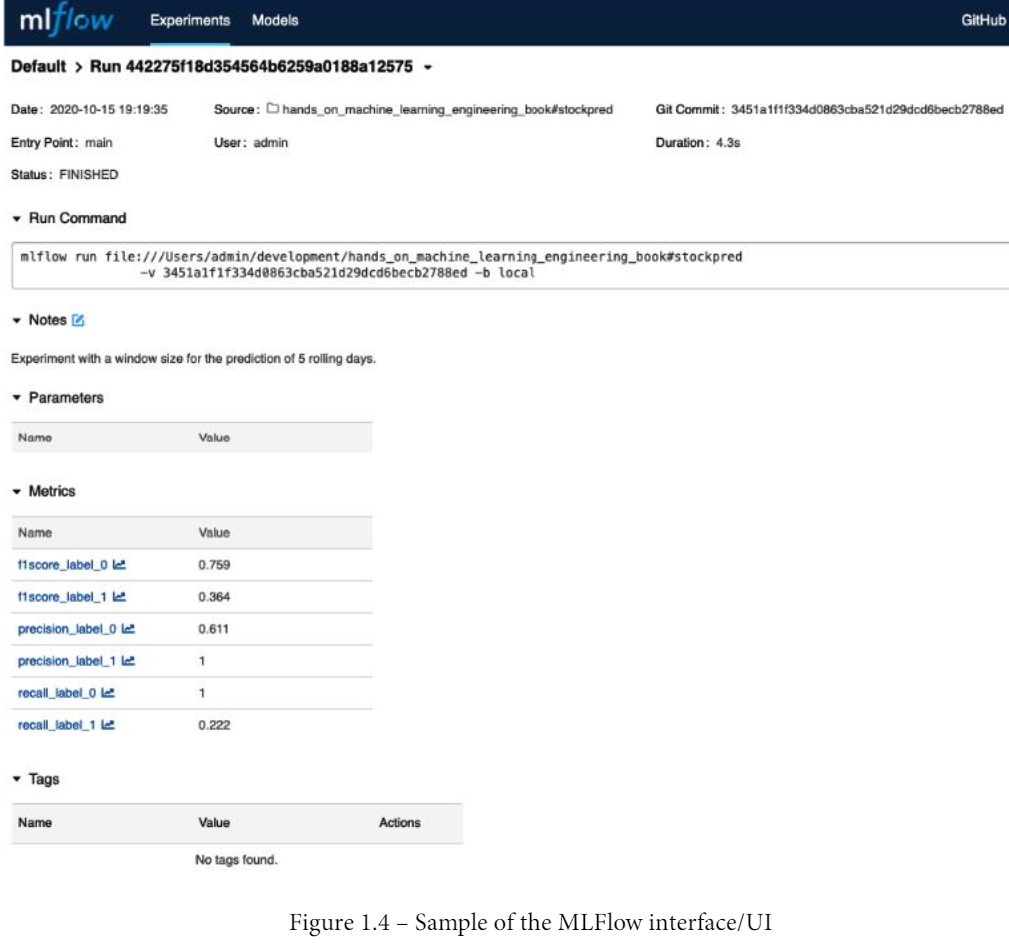

MLow permet l'inspection d'artefacts arbitraires associés à chaque modèle et ses métadonnées associées, permettant de comparer les métriques de différentes exécutions. Vous pouvez voir les RUN ID et le hachage Git du code qui a généré l'exécution spécifique de votre expérience


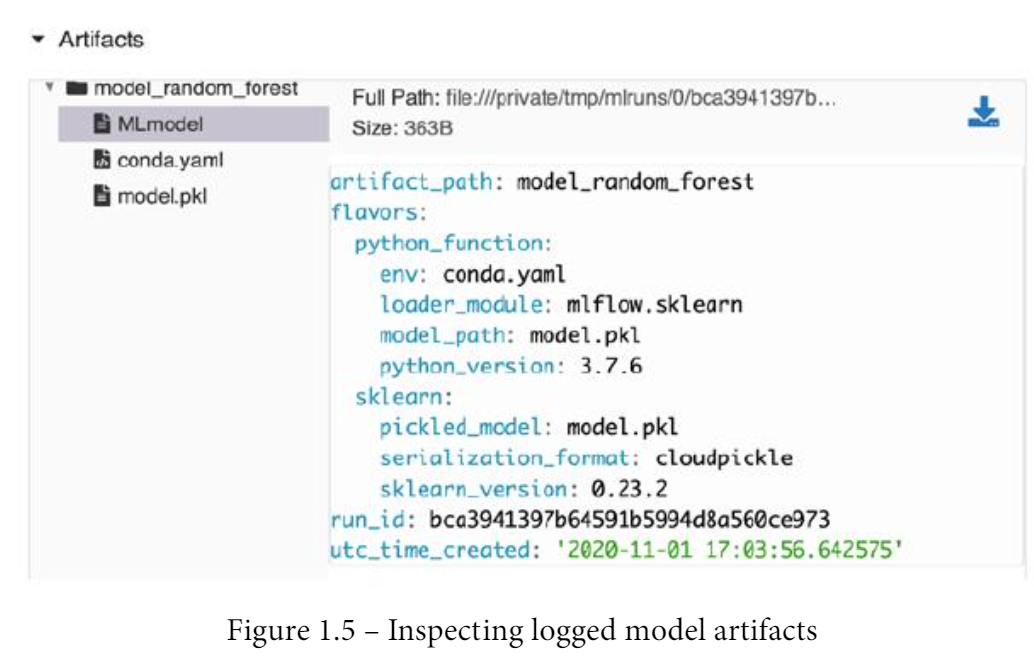

Dans votre répertoire courant de stockpred, vous pouvez exécuter la commande suivante pour avoir accès aux résultats de vos runs :


    mlflow ui

L'exécution locale de l'interface utilisateur MLflow la rendra disponible à l'URL suivante : http://127.0.0.1:5000/. Dans le cas particulier des exécutions illustrées dans la capture d'écran suivante, nous avons une expérience nommée où le paramètre du la taille de la fenêtre dans l'exemple précédent a été modifiée. 

Des différences claires peuvent être observées entre les performances des algorithmes en termes de score F1

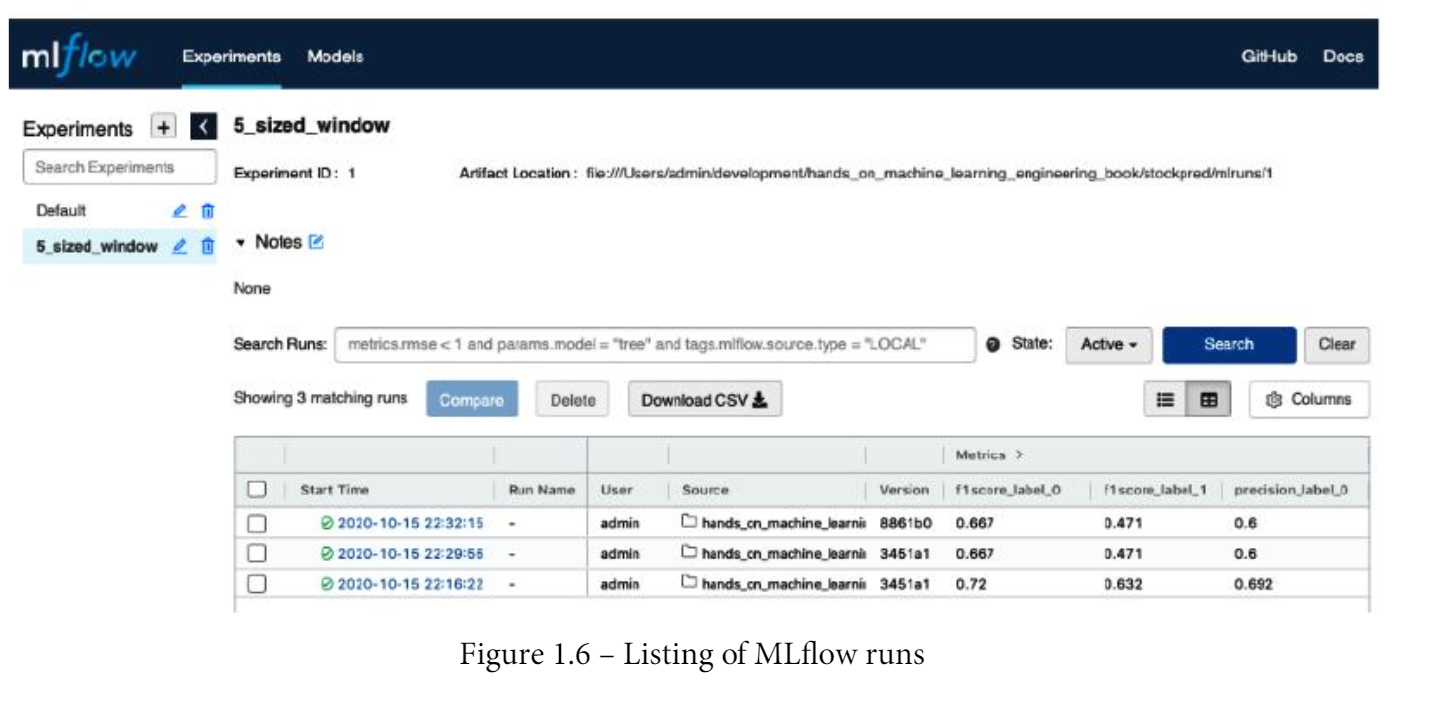

Une autre fonctionnalité très utile du suivi MLFlow est la possibilité de comparer différentes exécutions de tâches :

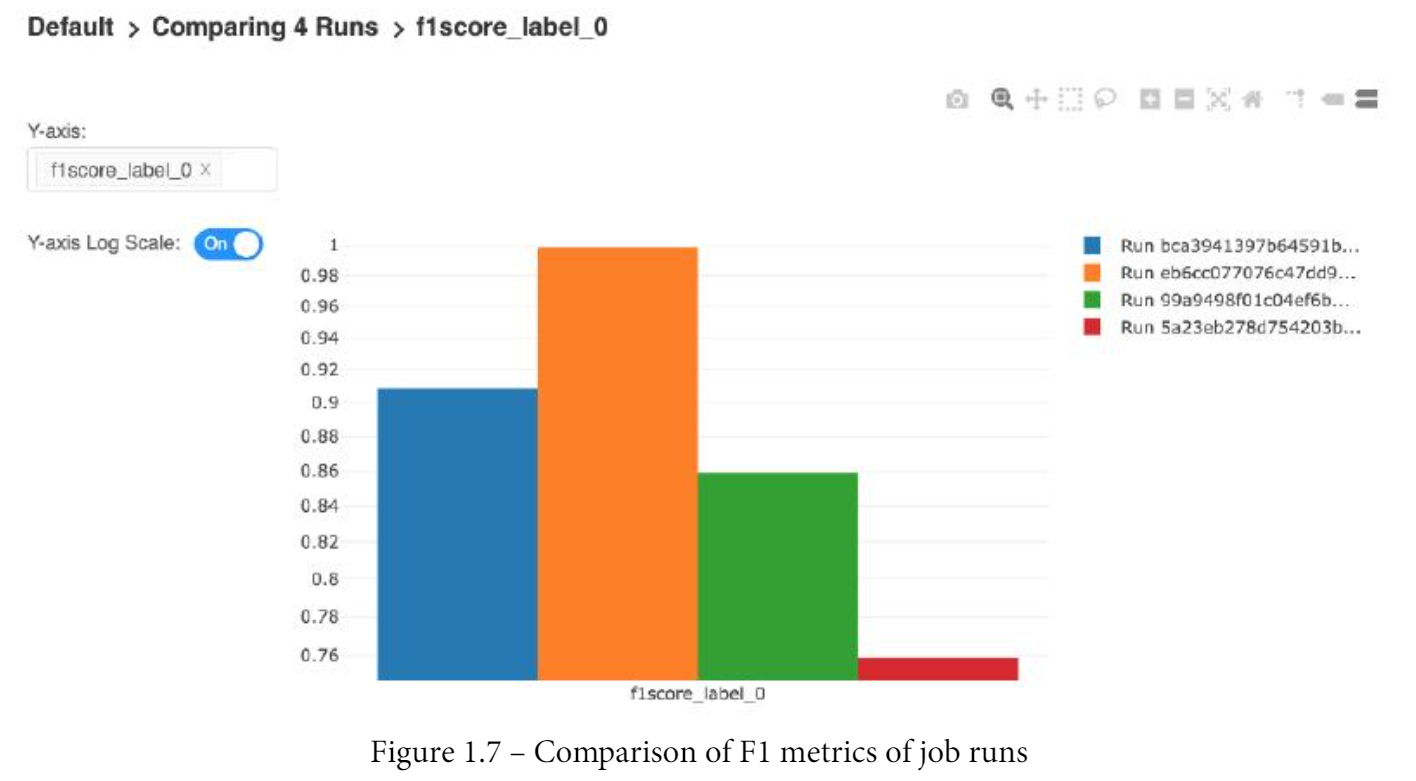

Cette visualisation précédente permet à un praticien de prendre une décision quant au modèle à utiliser en production ou s'il doit itérer davantage

## Exploration de MLow Models

Les modèles de MLgflow sont le composant principal qui gère les différentes saveurs de modèle prises en charge dans MLflow et intermédiaire le déploiement dans différents environnements d'exécution. Nous allons maintenant approfondir les différents modèles pris en charge. dans la dernière version de MLflow.

 Comme indiqué dans la section Premiers pas avec MLflow, les modèles MLflow ont une approche de sérialisation spécifique lorsque le modèle est conservé dans son format interne. Par exemple, le dossier sérialisé du modèle implémenté sur le projet stockpred ressemblerait à ceci :



    ├── MLmodel
    ├── conda.yaml
    └── model.pkl


En interne, les modèles MLflow sklearn sont conservés avec les fichiers conda avec leurs dépendances au moment de l'exécution et un modèle picklé tel qu'enregistré par le code source :

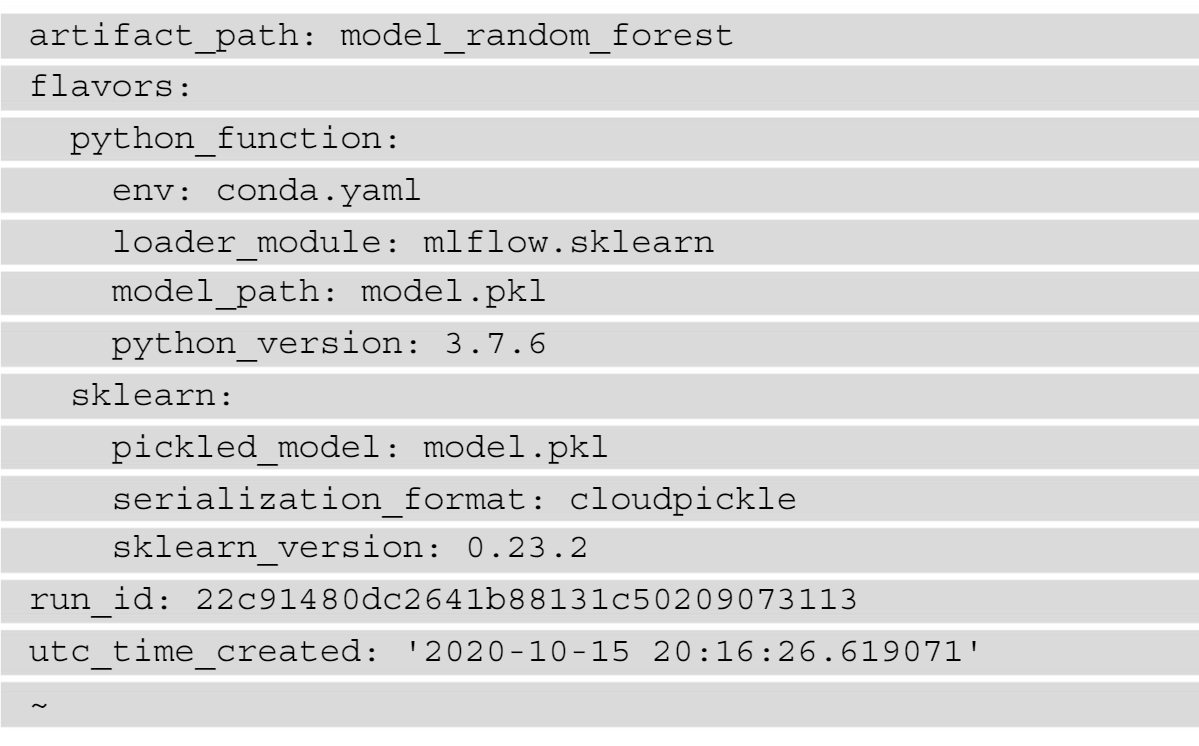

MLflow, par défaut, prend en charge les modèles de service de deux manières, à savoir, en tant que python_function ou au format sklearn. Les saveurs sont essentiellement un format à utiliser par des outils ou des environnements servant des modèles. 

Un bon exemple d'utilisation de ce qui précède est de pouvoir servir votre modèle sans aucun code supplémentaire en exécutant la commande suivante :



    mlflow models serve -m ./mlruns/0/b9ee36e80a934cef9cac3a0513db515c/artifacts/model_random_forest/


Vous avez accès à un serveur Web très simple qui peut exécuter votre modèle. Votre interface de prédiction de modèle peut être exécutée en exécutant la commande suivante :



    curl http://127.0.0.1:5000/invocations -H 'Content-Type: application/json' -d '{"data":[[1,1,1,1,0,1,1,1,0,1,1,1,0,0]]}' [1]%



La réponse à l'appel API de notre modèle était 1 ; comme défini dans notre variable prédite, cela signifie qu'à la prochaine lecture, le stock augmentera. Les dernières étapes décrivent à quel point MLow est puissant en tant qu'outil de bout en bout pour le développement de modèles, y compris pour le prototypage d'API basées sur REST pour les services ML


Le composant MLflow Models permet la création de modules Python sur mesure qui auront les mêmes avantages que les modèles intégrés, tant qu'une interface de prédiction est suivie. Certains des types de modèles notables pris en charge seront explorés dans les chapitres à venir, y compris les suivants : 

* Format de modèle XGBoost
* Fonctions R
* Modèle H2O
* Keras
* PyTorch
* Sklearn
* Spark MLib
* TensorFlow
* Fastai

Support pour les types de modèles ML les plus courants, combiné à sa capacité intégrée pour locaux et le déploiement dans le cloud, est l'une des caractéristiques les plus fortes des modèles MLflow. Nous explorerons cela plus en détail dans les chapitres relatifs au déploiement

## Explorer MLflow Model Registry

Le composant de registre de modèle dans MLflow donne au développeur ML une abstraction pour la gestion du cycle de vie du modèle. Il s'agit d'un magasin centralisé pour une organisation ou une fonction qui permet de partager, de créer et d'archiver les modèles de l'organisation de manière collaborative. La gestion du modèle peut être effectuée avec les différentes API de MLflow et avec l'interface utilisateur. La figure 1.7 illustre l'interface utilisateur des artefacts dans le serveur de suivi qui peut être utilisée pour enregistrer un modèle :

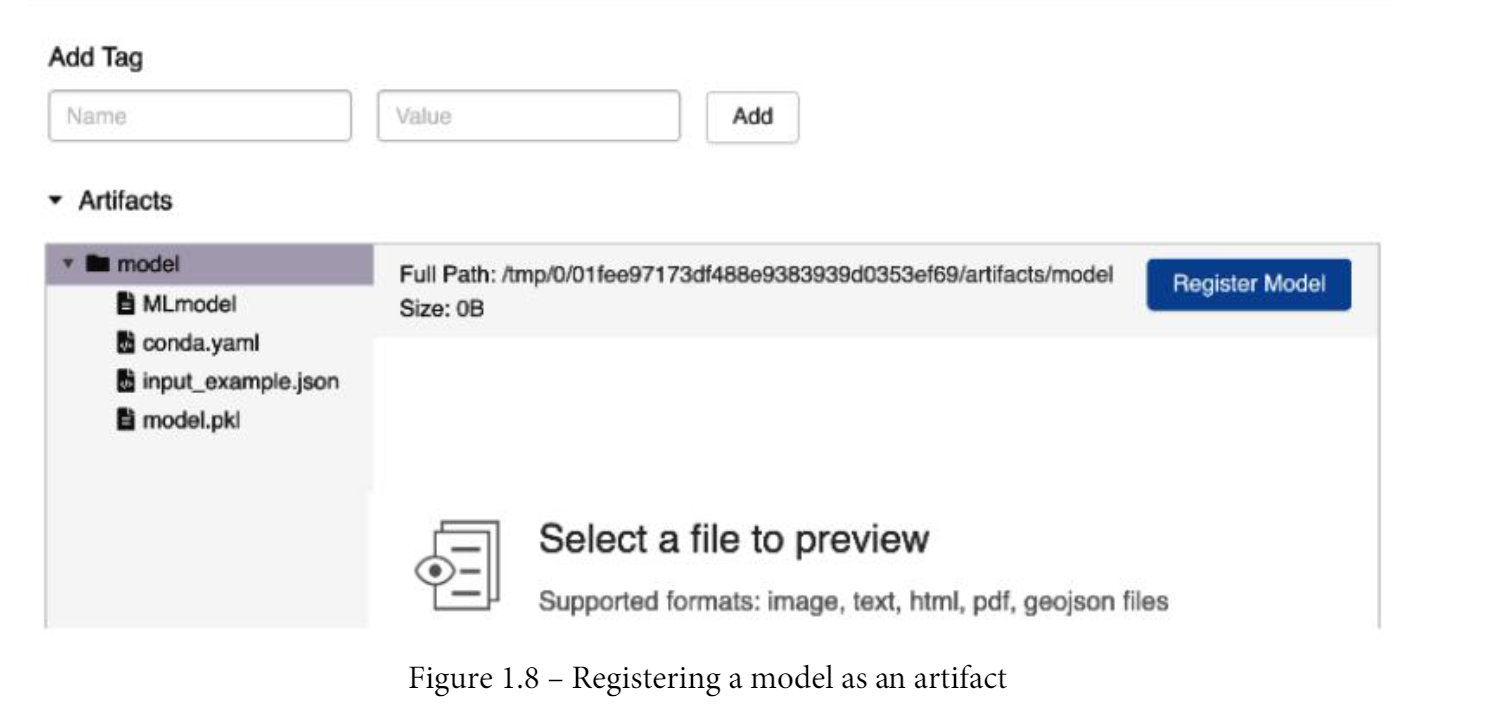


Lors de l'enregistrement du modèle, vous pouvez annoter le modèle enregistré avec les métadonnées pertinentes et gérer son cycle de vie. Un exemple consiste à avoir des modèles dans un environnement de pré-production intermédiaire et à gérer le cycle de vie en envoyant le modèle en production :


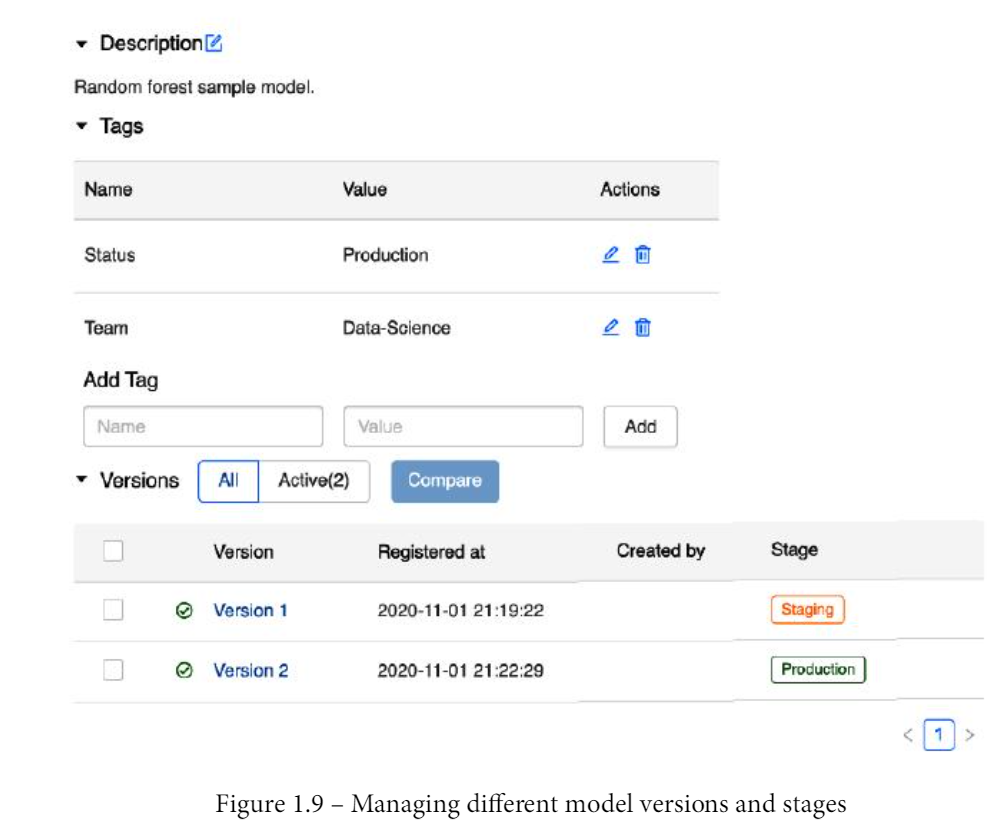

Le module de registre de modèles sera exploré plus en détail dans le livre, avec des détails sur la façon de configurer un serveur centralisé et de gérer les cycles de vie des modèles ML, de la conception à la suppression progressive d'un modèle.

## Résumé

Dans ce chapitre, nous avons présenté MLflow et exploré certaines des motivations derrière l'adoption d'une plate-forme ML pour réduire le temps entre le développement du modèle et la production dans le développement ML.

 Grâce aux connaissances et à l'expérience acquises dans ce chapitre, vous pouvez commencer à améliorer et à rendre votre flux de travail de développement ML reproductible et traçable. Nous nous sommes penchés sur chacun des modules importants de la plate-forme : projets, modèles, trackers et registre de modèles. Un accent particulier a été mis sur des exemples pratiques pour illustrer chacune des fonctionnalités de base, vous permettant d'avoir une approche pratique de la plate-forme. MLflow propose plusieurs fonctionnalités prêtes à l'emploi qui réduiront les frictions dans le cycle de vie du développement ML avec un minimum de code et de configuration. La gestion des métriques, la gestion des modèles et la reproductibilité prêtes à l'emploi sont fournies par MLflow. Nous nous appuierons sur ces connaissances introductives et élargirons nos compétences et nos connaissances en termes de création de plates-formes ML pratiques dans le reste des chapitres. Nous avons brièvement présenté dans ce chapitre le cas d'utilisation de la prédiction boursière, qui sera utilisé dans la suite du livre. Dans le chapitre suivant, nous nous concentrerons sur la dénition rigoureuse du problème ML de prédiction boursière